### Challenge : Hardwork pays of
#### Given hours of a student studying, find the score

In [42]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("dark_background")

#### Loading the dataset:

In [43]:
x_train = pd.read_csv("Training Data/Linear_X_Train.csv")
x_train.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [44]:
y_train = pd.read_csv("Training Data/Linear_Y_Train.csv")
y_train.head()

,y
0,-0.091101
1,-53.467721
2,75.457009
3,-12.025286
4,57.414187


A single featured dataset

In [45]:
x_train.shape, y_train.shape

((3750, 1), (3750, 1))

In [46]:
# Checking for normalisation
x_train.values.mean(), x_train.values.std()

(-0.03779466168006854, 0.9920801322508517)

The data is already normalised

#### Visualisation

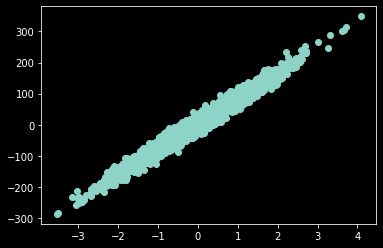

In [47]:
plt.scatter(x_train, y_train)

In [48]:
x_train.corrwith(y_train["y"])

x    0.985374
dtype: float64

In [49]:
# Extracting data:
x_data, y_data = x_train.values.reshape(-1), y_train.values.reshape(-1)
x_data.shape

(3750,)

Pretty correlated data

#### Applying the Gradient Descent Algorithm

In [50]:
# The hypothesis function
def hypothesis(x, theta):
    y_ = theta[0] + theta[1] * x
    return y_

In [51]:
# Getting the gradient
def gradient(x, y, theta):
    m = x.shape[0] # Number of values

    grad = np.zeros((2,))

    for i in range(m):
        y_ = hypothesis(x[i], theta)
        grad[0] += (y_ - y[i])
        grad[1] += (y_ - y[i])*x[i]

    return grad/m

In [52]:
# To get the error
def error(x, y, theta):
    m = x.shape[0]
    total_error = 0.0

    for i in range(m):
        y_ = hypothesis(x[i], theta)
        total_error += (y_ - y[i]) ** 2

    return total_error/m

In [53]:
# Defining the main gradient descent function
def gradientDescent(x, y, learning_rate = 0.1, max_steps = 100):

    theta = np.zeros((2,))
    error_list = []

    for i in range(max_steps):

        # Compute gradient
        grad = gradient(x, y, theta)
        e = error(x, y, theta)
        error_list.append(e)
        # Updating theta
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]

    return theta, error_list

In [54]:
theta, error_list = gradientDescent(x_data, y_data)

In [56]:
theta

array([ 3.72687896, 80.54086647])

Hence we get the best fit line for $y = 3.72x + 80.5$

Visualising the error:

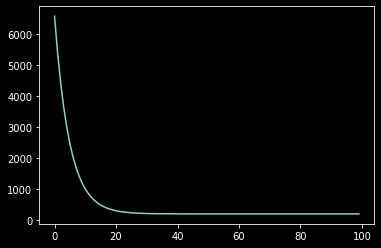

In [59]:
plt.plot(error_list)
plt.show()

In [60]:
error_list[-1]

190.95558982312986

We can see that the error saturates at $190$